In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Combined data

In [2]:
horizontal = np.load('./horizontal_data/h_combined_data.npy')
vertical = np.load('./vertical_data/v_combined_data.npy')

In [3]:
print(np.shape(horizontal))
print(np.shape(vertical))

(183, 150, 155, 1)
(183, 150, 155, 1)


In [4]:
print(np.allclose(horizontal, vertical))

False


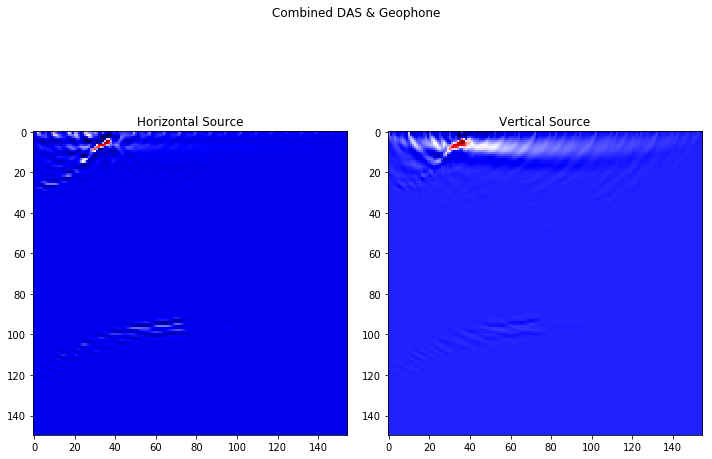

In [5]:
fig, axes = plt.subplots(1,2,figsize=(10,8))
axes[0].imshow(horizontal[100,:,:,0], cmap='seismic')
axes[0].set_title('Horizontal Source')
axes[1].imshow(vertical[100,:,:,0], cmap='seismic')
axes[1].set_title('Vertical Source')
fig.suptitle('Combined DAS & Geophone')
fig.tight_layout()
plt.show()

### DAS only

In [6]:
horizontal_DAS = np.load('./horizontal_data/h_das_data.npy')
vertical_DAS = np.load('./vertical_data/v_das_data.npy')

In [7]:
print(np.shape(horizontal_DAS))

(183, 150, 155, 1)


### geophone only

In [8]:
horizontal_geophone = np.load('./horizontal_data/h_geophone_data.npy')
vertical_geophone = np.load('./vertical_data/v_geophone_data.npy')

In [9]:
Hcombined_data = np.load('horizontal_data/h_combined_data.npy')
Vcombined_data = np.load('vertical_data/v_combined_data.npy')

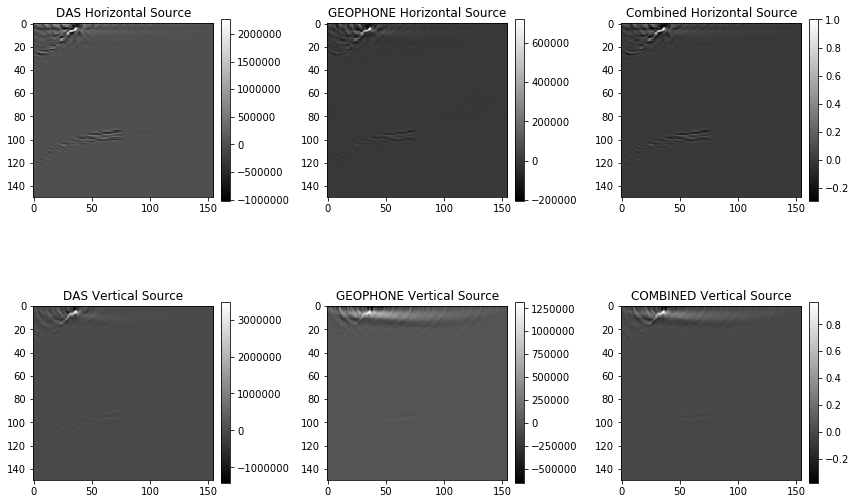

In [10]:
fig, axes = plt.subplots(2,3,figsize=(12,8))
im0=axes[0, 0].imshow(horizontal_DAS[100,:,:,0], cmap='gray')
axes[0, 0].set_title('DAS Horizontal Source')
fig.colorbar(im0, ax=axes[0,0], fraction=0.046, pad=0.04)

im2=axes[0, 1].imshow(horizontal_geophone[100,:,:,0], cmap='gray')
axes[0, 1].set_title('GEOPHONE Horizontal Source')
fig.colorbar(im2, ax=axes[0,1], fraction=0.046, pad=0.04)

im1=axes[0, 2].imshow(Hcombined_data[100,:,:,0], cmap='gray')
axes[0, 2].set_title('Combined Horizontal Source')
fig.colorbar(im1, ax=axes[0,2], fraction=0.046, pad=0.04)

im1=axes[1, 0].imshow(vertical_DAS[100,:,:,0], cmap='gray')
axes[1, 0].set_title('DAS Vertical Source')
fig.colorbar(im1, ax=axes[1,0], fraction=0.046, pad=0.04)

im3=axes[1, 1].imshow(vertical_geophone[100,:,:,0], cmap='gray')
axes[1, 1].set_title('GEOPHONE Vertical Source')
fig.colorbar(im3, ax=axes[1,1], fraction=0.046, pad=0.04)

im3=axes[1, 2].imshow(Vcombined_data[100,:,:,0], cmap='gray')
axes[1, 2].set_title('COMBINED Vertical Source')
fig.colorbar(im3, ax=axes[1,2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

## Re-plot standardized version
from notebook `Unet_Faults`
```
# Standardization across entire dataset
data_mean = np.mean(resized_data)
data_std = np.std(resized_data)
data_scaled = (resized_data-data_mean)/data_std```

In [11]:
from skimage.transform import resize
?resize

In [12]:
horizontal_DAS_array = np.reshape(horizontal_DAS, (183*150, 155), order='F')
meanByImage =np.mean(horizontal_DAS_array,0)
stdByImage = np.std(horizontal_DAS_array,0)
horizontalDASArray_scaled = (horizontal_DAS_array-meanByImage)/stdByImage
horizontalDAS_scaled = np.reshape(horizontalDASArray_scaled,(183,150,155),order='F')

In [13]:
horizontal_geophone_array = np.reshape(horizontal_geophone, (183*150,155), order='F')
meanByImage =np.mean(horizontal_geophone_array,0)
stdByImage = np.std(horizontal_geophone_array,0)
horizontalGeophoneArray_scaled = (horizontal_geophone_array-meanByImage)/stdByImage
horizontalGeophone_scaled = np.reshape(horizontalGeophoneArray_scaled,(183,150,155),order='F')

In [14]:
horizontal_combined_array = np.reshape(Hcombined_data, (183*150,155), order='F')
meanByImage =np.mean(horizontal_combined_array,0)
stdByImage = np.std(horizontal_combined_array,0)
horizontalCombinedArray_scaled = (horizontal_combined_array-meanByImage)/stdByImage
horizontalCombined_scaled = np.reshape(horizontalCombinedArray_scaled,(183,150,155),order='F')

In [15]:
vertical_DAS_array = np.reshape(vertical_DAS, (183*150, 155), order='F')
meanByImage =np.mean(vertical_DAS_array,0)
stdByImage = np.std(vertical_DAS_array,0)
verticalDASArray_scaled = (vertical_DAS_array-meanByImage)/stdByImage
verticalDAS_scaled = np.reshape(verticalDASArray_scaled,(183,150,155),order='F')

In [16]:
vertical_geophone_array = np.reshape(vertical_geophone, (183*150,155), order='F')
meanByImage =np.mean(vertical_geophone_array,0)
stdByImage = np.std(vertical_geophone_array,0)
verticalGeophoneArray_scaled = (vertical_geophone_array-meanByImage)/stdByImage
verticalGeophone_scaled = np.reshape(verticalGeophoneArray_scaled,(183,150,155),order='F')

In [17]:
vertical_combined_array = np.reshape(Vcombined_data, (183*150,155), order='F')
meanByImage =np.mean(vertical_combined_array,0)
stdByImage = np.std(vertical_combined_array,0)
verticalCombinedArray_scaled = (vertical_combined_array-meanByImage)/stdByImage
verticalCombined_scaled = np.reshape(verticalCombinedArray_scaled, (183,150,155),order='F')

In [18]:
sliceP = 20 # 175

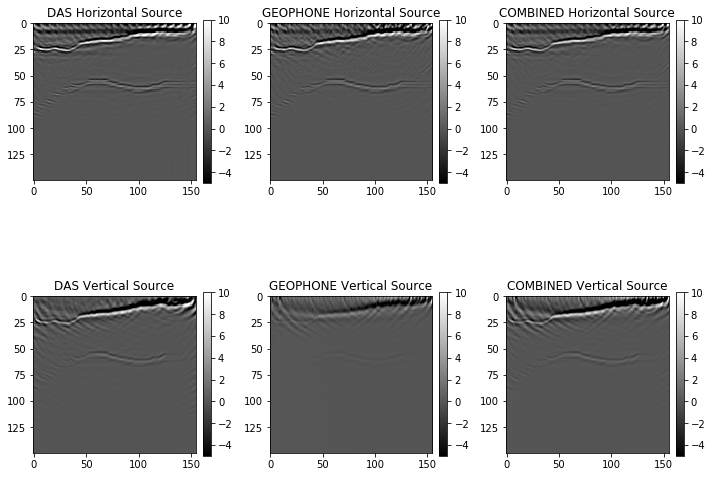

In [19]:
fig, axes = plt.subplots(2,3,figsize=(10,8))
im0=axes[0, 0].imshow(horizontalDAS_scaled[sliceP,:,:], vmin=-5, vmax=10, cmap='gray')
axes[0, 0].set_title('DAS Horizontal Source')
fig.colorbar(im0, ax=axes[0,0], fraction=0.046, pad=0.04)
im1=axes[0, 1].imshow(horizontalGeophone_scaled[sliceP,:,:], vmin=-5, vmax=10, cmap='gray') # vmin=-3, vmax=3
axes[0, 1].set_title('GEOPHONE Horizontal Source')
fig.colorbar(im1, ax=axes[0,1], fraction=0.046, pad=0.04)
im2=axes[0, 2].imshow(horizontalCombined_scaled[sliceP,:,:], vmin=-5, vmax=10, cmap='gray') # vmin=-3, vmax=3
axes[0, 2].set_title('COMBINED Horizontal Source')
fig.colorbar(im2, ax=axes[0,2], fraction=0.046, pad=0.04)


im3=axes[1, 0].imshow(verticalDAS_scaled[sliceP,:,:], vmin=-5, vmax=10, cmap='gray')
axes[1, 0].set_title('DAS Vertical Source')
fig.colorbar(im3, ax=axes[1,0], fraction=0.046, pad=0.04)
im4=axes[1, 1].imshow(verticalGeophone_scaled[sliceP,:,:], vmin=-5, vmax=10,cmap='gray') #! ! ! !
axes[1, 1].set_title('GEOPHONE Vertical Source')
fig.colorbar(im4, ax=axes[1,1], fraction=0.046, pad=0.04)
im5=axes[1, 2].imshow(verticalCombined_scaled[sliceP,:,:], vmin=-5, vmax=10, cmap='gray') # vmin=-3, vmax=3
axes[1, 2].set_title('COMBINED Vertical Source')
fig.colorbar(im5, ax=axes[1,2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

## Plot location of sources and receivers

In [164]:
#from PIL import Image
#?plt.savefig
?np.linspace # ?np.arange #
print(np.shape(horizontalDAS_scaled[100,:,:]))
print('each grid node is this in meters (meters/node)?:',2000/np.shape(horizontalDAS_scaled[100,:,:])[1])

print('Sources every 75 meters. Sx every %3.3f node'%(75/(2000/np.shape(horizontalDAS_scaled[100,:,:])[1])))
print('Geophones every 100 meters. GP every %3.3f node'%(100/(2000/np.shape(horizontalDAS_scaled[100,:,:])[1])))
print('DAS every 1 meters. DAS every %3.3f node'%(1/(2000/np.shape(horizontalDAS_scaled[100,:,:])[1])))

(150, 155)
each grid node is this in meters (meters/node)?: 12.903225806451612
Sources every 75 meters. Sx every 5.812 node
Geophones every 100 meters. GP every 7.750 node
DAS every 1 meters. DAS every 0.077 node


In [23]:
slice0 = 175


# Location of sources ~2km across?? PoroTomo Y?
# every 75 meters

In [36]:

Sx_locations = np.arange(0,150,6) #[start,] stop[, step,],

# Location of receivers
DAS_locations = np.arange(0,150,1) # EVERY meter
Geophone_locations = np.arange(0,150,8)# geophones every 100 meters

# X grid node's 
node_inMeters = 2000/np.shape(horizontalDAS_scaled[100,:,:])[1]
#XlabelsMeters = np.arange(node_inMeters, node_inMeters*np.shape(horizontalDAS_scaled[100,:,:])[1], node_inMeters)
XlabelsMeters = np.arange(0, node_inMeters*(np.shape(horizontalDAS_scaled[100,:,:])[1]+1), node_inMeters)
XlabelsMeters
#print(np.shape(XlabelsMeters[[0,50,100,150]]))
# X grid node's 
Znode_inMeters = 2000/np.shape(horizontalDAS_scaled[100,:,:])[0]
#ZlabelsMeters = np.arange(Znode_inMeters, Znode_inMeters*np.shape(horizontalDAS_scaled[100,:,:])[0], Znode_inMeters)
ZlabelsMeters = np.arange(0, Znode_inMeters*(np.shape(horizontalDAS_scaled[100,:,:])[0]+1), Znode_inMeters)
ZlabelsMeters[[0,-1]]

array([   0., 2000.])

# Save figure with receiver locations

In [37]:
!ls -d */
!pwd

horizontal_data/               models/
images_for_presentation_paper/ vertical_data/
/Users/wtrainor/Library/Mobile Documents/com~apple~CloudDocs/Students/Samir/Geophysics/UNet/unet_fault_detection


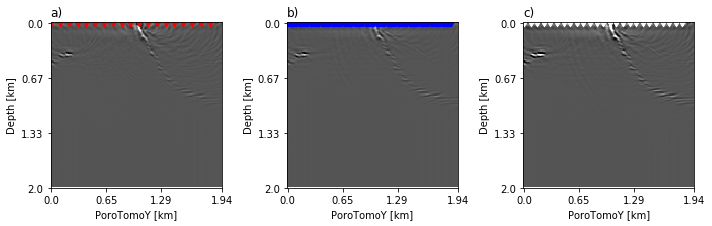

In [50]:
from matplotlib.ticker import FormatStrFormatter

XMlabels = XlabelsMeters[[0,50,100,150]]/1000; #print(XMlabels)
ZMlabels = ZlabelsMeters[[0,50,100,150]]/1000;
fig, axes = plt.subplots(1,3,figsize=(10,8))

axes[1].scatter(DAS_locations,-1*np.ones(np.shape(DAS_locations)),color='blue',marker='d')
im0=axes[1].imshow(horizontalDAS_scaled[slice0,:,:], vmin=-5, vmax=10, cmap='gray')
im0=axes[1].set_title('b)', loc='left') #('DAS Horizontal Source')

#fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

axes[0].scatter(Geophone_locations,-1*np.ones(np.shape(Geophone_locations)),color='red',marker='d')
im1=axes[0].imshow(horizontalGeophone_scaled[slice0,:,:], vmin=-5, vmax=10, cmap='gray') # vmin=-3, vmax=3
axes[0].set_title('a)', loc='left') #('GEOPHONE Horizontal Source')
#fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

axes[2].scatter(Sx_locations,-1*np.ones(np.shape(Sx_locations)),color='white',marker='d')
im2=axes[2].imshow(horizontalCombined_scaled[slice0,:,:], vmin=-5, vmax=10, cmap='gray') # vmin=-3, vmax=3
axes[2].set_title('c)', loc='left') #('COMBINED Horizontal Source')
#fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

for axInd in np.arange(0,3):
    #print(axInd)
    axes[axInd].set_xticks([0,50,100,155]) #index values
    axes[axInd].set_xticklabels([str(round(float(label), 2)) for label in XMlabels])
    axes[axInd].set_xlabel('PoroTomoY [km]')
    axes[axInd].set_yticks([0,50,100,150]) #index values
    axes[axInd].set_yticklabels([str(round(float(label), 2)) for label in ZMlabels])
    axes[axInd].set_ylabel('Depth [km]')
    

plt.tight_layout()
FigNAme = '/Users/wtrainor/Library/Mobile Documents/com~apple~CloudDocs/Students/Samir/Geophysics/UNet/ArticleE/Fig/Horizontal_receiverLocations_3RTM_Slice_%s.pdf'%str(slice0)
plt.savefig(FigNAme,dpi=800, bbox_inches='tight', transparent=True) #,format='ps')
plt.show()

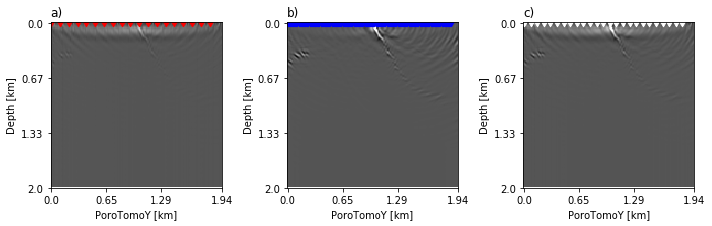

In [51]:
fig, axes = plt.subplots(1,3,figsize=(10,8))

axes[1].scatter(DAS_locations,-1*np.ones(np.shape(DAS_locations)),color='blue',marker='d')
im0=axes[1].imshow(verticalDAS_scaled[slice0,:,:], vmin=-5, vmax=10, cmap='gray')
axes[1].set_title('b)', loc='left') #('DAS Vertical Source')

#fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

axes[0].scatter(Geophone_locations,-1*np.ones(np.shape(Geophone_locations)),color='red',marker='d')
im1=axes[0].imshow(verticalGeophone_scaled[slice0,:,:], cmap='gray', vmin=-5, vmax=10)
axes[0].set_title('a)', loc='left') #('GEOPHONE Vertical Source')
#fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

axes[2].scatter(Sx_locations,-1*np.ones(np.shape(Sx_locations)),color='white',marker='d')
im2=axes[2].imshow(verticalCombined_scaled[slice0,:,:], cmap='gray', vmin=-5, vmax=10) # vmin=-3, vmax=3
axes[2].set_title('c)', loc='left') #('COMBINED Vertical Source')
#fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

for axInd in np.arange(0,3):
    #print(axInd)
    axes[axInd].set_xticks([0,50,100,155]) #index values
    axes[axInd].set_xticklabels([str(round(float(label), 2)) for label in XMlabels])
    axes[axInd].set_xlabel('PoroTomoY [km]')
    axes[axInd].set_yticks([0,50,100,150]) #index values
    axes[axInd].set_yticklabels([str(round(float(label), 2)) for label in ZMlabels])
    axes[axInd].set_ylabel('Depth [km]')

plt.tight_layout()
VertFigName = '/Users/wtrainor/Library/Mobile Documents/com~apple~CloudDocs/Students/Samir/Geophysics/UNet/ArticleE/Fig/Vertical_receiverLocations_Slice_%s.pdf'%str(slice0)
plt.savefig(VertFigName,dpi=800, bbox_inches='tight', transparent=True) #,format='ps')
plt.show()

## Figure of labels

In [8]:
labels = np.load(r'./horizontal_data/h_fault_labels.npy')
np.shape(labels[slice0,:,:,0])

(150, 155)

/Users/wtrainor/Library/Mobile Documents/com~apple~CloudDocs/Students/Samir/Geophysics/UNet/ArticleE/Fig/FaultLabelsSlice_100.pdf


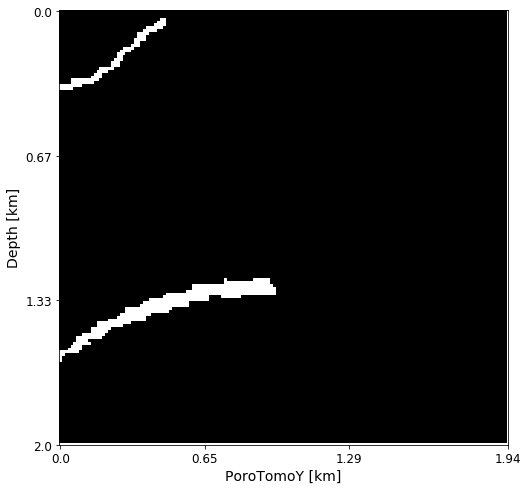

In [22]:
XMlabels = XlabelsMeters[[0,50,100,150]]/1000; #print(XMlabels)
ZMlabels = ZlabelsMeters[[0,50,100,150]]/1000;

fig, axes = plt.subplots(1,1,figsize=(10,8))

im2=axes.imshow(labels[slice0,:,:,0], cmap='gray') # vmin=-3, vmax=3
#axes.set_title('Faults at slice %d'%slice0)
#fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

axes.set_xticks([0,50,100,155]) #index values
axes.set_xticklabels([str(round(float(label), 2)) for label in XMlabels],fontsize=12)
axes.set_xlabel('PoroTomoY [km]',fontsize=14)
axes.set_yticks([0,50,100,150]) #index values
axes.set_yticklabels([str(round(float(label), 2)) for label in ZMlabels],fontsize=12)
axes.set_ylabel('Depth [km]',fontsize=14)
    
FaultLabel_filepathName='/Users/wtrainor/Library/Mobile Documents/com~apple~CloudDocs/Students/Samir/Geophysics/UNet/ArticleE/Fig/FaultLabelsSlice_%s.pdf'%str(slice0)
print(FaultLabel_filepathName)
plt.savefig(FaultLabel_filepathName,dpi=800, bbox_inches='tight', transparent=True) #,format='ps')    
plt.show()

In [44]:
slice = 25

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10,8))
im0=axes[0, 0].imshow(horizontalDAS_scaled[slice,:,:], cmap='gray')
axes[0, 0].set_title('DAS Horizontal Source')
fig.colorbar(im0, ax=axes[0,0], fraction=0.046, pad=0.04)
im1=axes[0, 1].imshow(verticalDAS_scaled[slice,:,:], cmap='gray')
axes[0, 1].set_title('DAS Vertical Source')
fig.colorbar(im1, ax=axes[0,1], fraction=0.046, pad=0.04)
im2=axes[1, 0].imshow(horizontalGeophone_scaled[slice,:,:], cmap='gray') # vmin=-3, vmax=3
axes[1, 0].set_title('GEOPHONE Horizontal Source')
fig.colorbar(im2, ax=axes[1,0], fraction=0.046, pad=0.04)

im3=axes[1, 1].imshow(verticalGeophone_scaled[slice,:,:], cmap='gray')
axes[1, 1].set_title('GEOPHONE Vertical Source')
fig.colorbar(im3, ax=axes[1,1], fraction=0.046, pad=0.04)
plt.show()

In [ ]:
# resized_data = np.zeros((len(data), nx, ny, 1))
# resized_labels = np.zeros((len(data), nx, ny, 2))
# for i in range(len(resized_data)):
#     resized_data[i,:,:,0] = resize(data[i,:,:,0], (nx, ny))
#     resized_labels[i,:,:,1] = resize(labels[i,:,:,0], (nx, ny)) # flip on purpose?
#     resized_labels[i,:,:,0] = resize(labels[i,:,:,1], (nx, ny))
# resized_labels[resized_labels <= 0.5] = 0
# resized_labels[resized_labels > 0.5] = 1

In [11]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# scaler = StandardScaler()
# print(scaler.fit(horizontal_geophone))
# StandardScaler()
# print(scaler.mean_)

## Load in fault labels...

In [50]:
FaultLabels = np.load('./horizontal_data/h_fault_labels.npy')
np.shape(FaultLabels)

(183, 150, 155, 2)

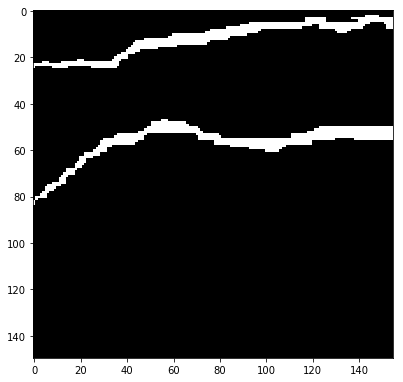

In [88]:
fig, axes = plt.subplots(1,1,figsize=(8,6.4))
#im0=axes[0, 0].imshow(FaultLabels[slice,:,:,0], cmap='seismic')
plt.imshow(FaultLabels[slice,:,:,0], cmap='gray')
#axes[0, 0].set_title('Fault locations')
#fig.colorbar(im0, ax=axes[0,0], fraction=0.046, pad=0.04)
plt.show()